In [1]:
# Download data from https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd

from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_stocks = pd.read_csv('data_stocks.csv')

In [3]:
data_stocks.sort_index(inplace=True)
data_stocks.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
#Figure out how many clusters are in the data
#Use the elbow method of clustering to determine the appropriate number of clusters: 
#reference: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

Text(0.5,1,'Elbow Method Interpolation')

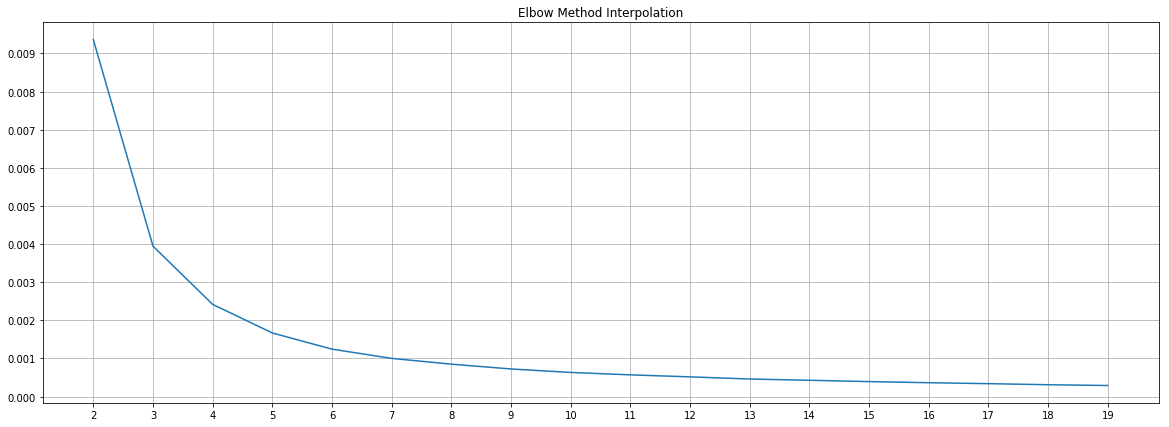

In [5]:
from math import sqrt
from sklearn.cluster import KMeans

# XIRR V VOL
xirr = data_stocks.pct_change().mean() * 252
xirr = pd.DataFrame(xirr)
xirr.columns = ['XIRR']
xirr['VOL'] = data_stocks.pct_change().std() * sqrt(252)
 
# make array for k
data = np.asarray([np.asarray(xirr['XIRR']),np.asarray(xirr['VOL'])]).T
 
X = data
distortion_score = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distortion_score.append(k_means.inertia_)
 
fig = plt.figure(figsize=(20, 7))
plt.xticks(np.arange(0, 20, step=1))
plt.yticks(np.arange(0.0, 0.12, step=0.001))
plt.plot(range(2, 20), distortion_score)
plt.grid(True)
plt.title('Elbow Method Interpolation')

In [6]:
#How to choose?
#Here we are subject to some interpretation... with the elbow method we choose the point 
#at which the graph flattens the most.. would it be 3, 4, 5, 6, 7, or 8? ... It's been awhile, 

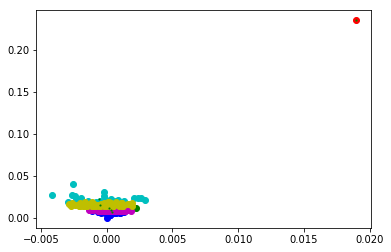

In [7]:
# run six clusters from elbow method
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)


# show the results
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'og',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'oc',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oy')
     
plot(centroids[:,0],centroids[:,1],'sg',markersize=1)
show()

In [8]:
#What's going on here?
#The little dot in the upper right hand corner is an annoying outlier that does not allow us to see 
#the grouping of our data... so let's get rid of it... 
#First we need to find out which stock is doing that, then we need to get rid of it :)

In [9]:
print(xirr.idxmax())

XIRR    NYSE.XRX
VOL     NYSE.XRX
dtype: object


In [10]:
#XRX -- Xerox

In [11]:
# Remove XRX  Xerox 
xirr.drop('NYSE.XRX',inplace=True)

# fix the array
data = np.asarray([np.asarray(xirr['XIRR']),np.asarray(xirr['VOL'])]).T

In [12]:
#Replot the clusters
#Now that we've smoothed out the data by dropping the outlier, let's replot the clusters to get a good look at what is going on.. and this time make the plot much bigger so we can get a good look :)

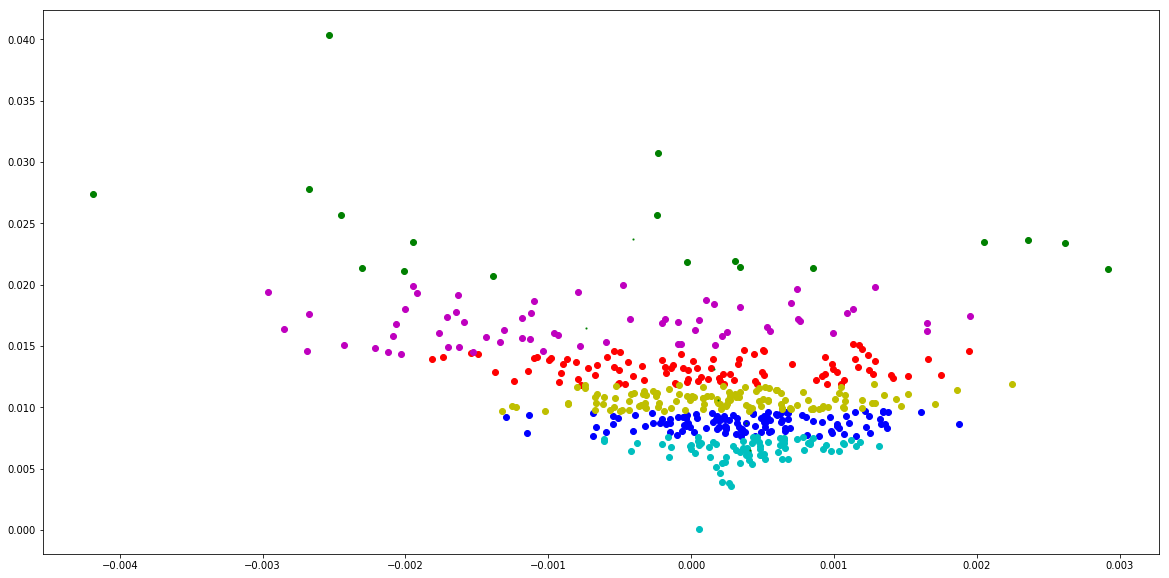

In [13]:
import pylab
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10
centroids,_ = kmeans(data,6)
idx,_ = vq(data,centroids)

pylab.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'og',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'oc',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oy')        
pylab.plot(centroids[:,0],centroids[:,1],'sg',markersize=1)
pylab.show()

In [14]:
#Which is which?
#So now we wish to see which stocks are grouped together.. easy to do in python... simply make a little list comprehension 
#to create tubles of the stock name and group.. notice below that the date and SP500 columns show up... 
#I left my mistake intentionally for myself :) I should have removed them first :) but now we have the answer that was asked.. 
#which stocks are grouped together :)

In [15]:
stocks = [(id,group) for id, group in zip(xirr.index,idx)]
 
for stock in stocks:
    print(stock)

('DATE', 3)
('SP500', 3)
('NASDAQ.AAL', 2)
('NASDAQ.AAPL', 5)
('NASDAQ.ADBE', 0)
('NASDAQ.ADI', 2)
('NASDAQ.ADP', 5)
('NASDAQ.ADSK', 4)
('NASDAQ.AKAM', 4)
('NASDAQ.ALXN', 4)
('NASDAQ.AMAT', 2)
('NASDAQ.AMD', 1)
('NASDAQ.AMGN', 0)
('NASDAQ.AMZN', 5)
('NASDAQ.ATVI', 2)
('NASDAQ.AVGO', 2)
('NASDAQ.BBBY', 4)
('NASDAQ.BIIB', 2)
('NASDAQ.CA', 2)
('NASDAQ.CBOE', 0)
('NASDAQ.CELG', 5)
('NASDAQ.CERN', 5)
('NASDAQ.CHRW', 2)
('NASDAQ.CHTR', 2)
('NASDAQ.CINF', 5)
('NASDAQ.CMCSA', 0)
('NASDAQ.CME', 0)
('NASDAQ.COST', 5)
('NASDAQ.CSCO', 5)
('NASDAQ.CSX', 5)
('NASDAQ.CTAS', 5)
('NASDAQ.CTSH', 0)
('NASDAQ.CTXS', 2)
('NASDAQ.DISCA', 4)
('NASDAQ.DISCK', 2)
('NASDAQ.DISH', 2)
('NASDAQ.DLTR', 4)
('NASDAQ.EA', 2)
('NASDAQ.EBAY', 5)
('NASDAQ.EQIX', 5)
('NASDAQ.ESRX', 2)
('NASDAQ.ETFC', 2)
('NASDAQ.EXPD', 0)
('NASDAQ.EXPE', 5)
('NASDAQ.FAST', 4)
('NASDAQ.FB', 0)
('NASDAQ.FFIV', 2)
('NASDAQ.FISV', 0)
('NASDAQ.FITB', 2)
('NASDAQ.FLIR', 5)
('NASDAQ.FOX', 2)
('NASDAQ.FOXA', 2)
('NASDAQ.GILD', 0)
('NASDAQ.GOOG', 